In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
synth_df=pd.read_csv('Synthetic_data_final.csv')

In [4]:
X=synth_df.values[:,:-1]
y=synth_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [5]:
geo_X_train=X_train[:,0:4]
geo_X_test=X_test[:,0:4]
url_X_train=X_train[:,4:1428]
url_X_test=X_test[:,4:1428]
alt_X_train=X_train[:,1428:1558]
alt_X_test=X_test[:,1428:1558]

In [6]:
geo_input=keras.Input(shape=(4,),name='geo')
geo_x=layers.Dense(16,activation='sigmoid')(geo_input)
geo_x=layers.Dense(8,activation='sigmoid')(geo_x)
geo_output=layers.Dense(1,activation='sigmoid')(geo_x)

In [7]:
url_input=keras.Input(shape=(1424,),name='url') 
# url_x=layers.Dense(320,activation='sigmoid')(url_input)
url_x=layers.Dense(128,activation='sigmoid')(url_input)
url_output=layers.Dense(16,activation='sigmoid')(url_x)

In [8]:
alt_input=keras.Input(shape=(130,),name='alt') 
alt_x=layers.Dense(64,activation='sigmoid')(alt_input)
alt_x=layers.Dense(20,activation='sigmoid')(alt_x)
alt_output=layers.Dense(1,activation='sigmoid')(alt_x)

In [9]:
xf1=layers.concatenate([geo_output,url_output,alt_output])
xf1=layers.Dense(5,activation='sigmoid')(xf1)
result=layers.Dense(1, name="ad/nonad")(xf1)

In [10]:
model=keras.Model(inputs=[geo_input,url_input,alt_input],outputs=[result])

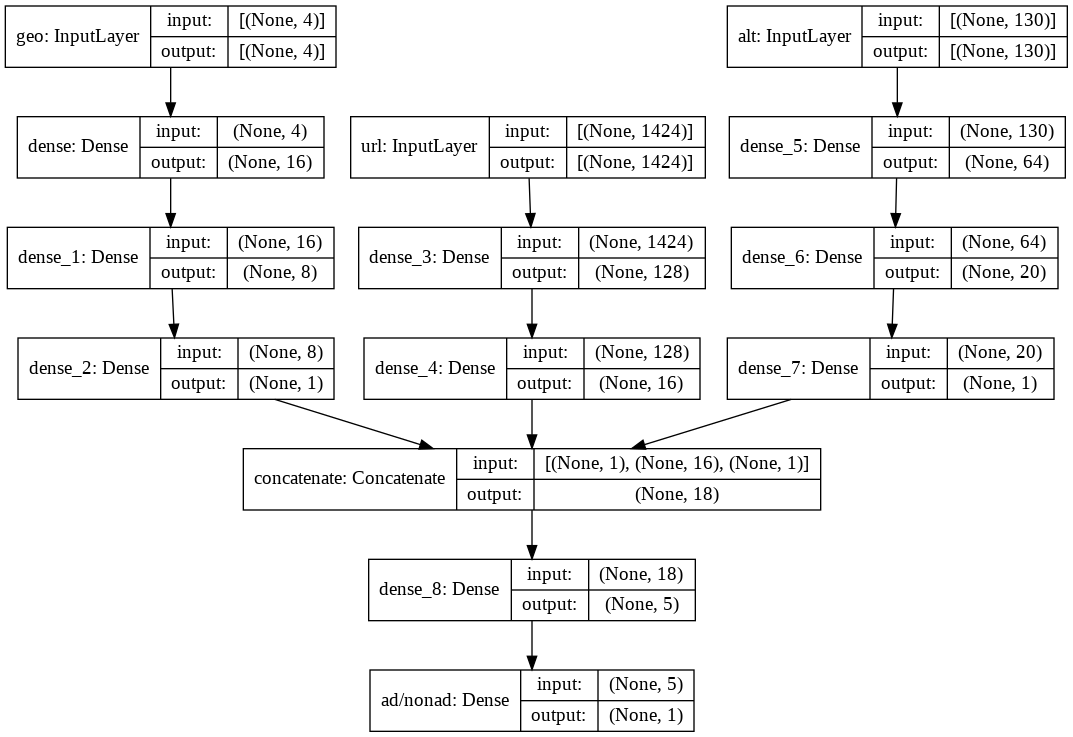

In [11]:
keras.utils.plot_model(model, "multi_modal_3_final.png", show_shapes=True)

In [12]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        # keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    metrics=['accuracy'],
    
)

In [13]:
model.fit(
    {"geo": geo_X_train, "url": url_X_train ,
      "alt": alt_X_train ,
       },
    {"ad/nonad": y_train},
    epochs=400,
    batch_size=64,
    validation_split=0.125,
    verbose=2,

)

Epoch 1/400
45/45 - 2s - loss: 0.6261 - accuracy: 0.6594 - val_loss: 0.5961 - val_accuracy: 0.8589
Epoch 2/400
45/45 - 0s - loss: 0.5650 - accuracy: 0.8716 - val_loss: 0.5275 - val_accuracy: 0.8832
Epoch 3/400
45/45 - 0s - loss: 0.4947 - accuracy: 0.8855 - val_loss: 0.4622 - val_accuracy: 0.9051
Epoch 4/400
45/45 - 0s - loss: 0.4341 - accuracy: 0.8953 - val_loss: 0.4051 - val_accuracy: 0.9100
Epoch 5/400
45/45 - 0s - loss: 0.3852 - accuracy: 0.9054 - val_loss: 0.3655 - val_accuracy: 0.9124
Epoch 6/400
45/45 - 0s - loss: 0.3477 - accuracy: 0.9127 - val_loss: 0.3306 - val_accuracy: 0.9173
Epoch 7/400
45/45 - 0s - loss: 0.3178 - accuracy: 0.9175 - val_loss: 0.3045 - val_accuracy: 0.9197
Epoch 8/400
45/45 - 0s - loss: 0.2937 - accuracy: 0.9193 - val_loss: 0.2888 - val_accuracy: 0.9173
Epoch 9/400
45/45 - 0s - loss: 0.2742 - accuracy: 0.9196 - val_loss: 0.2693 - val_accuracy: 0.9173
Epoch 10/400
45/45 - 0s - loss: 0.2580 - accuracy: 0.9200 - val_loss: 0.2591 - val_accuracy: 0.9148
Epoch 11/

In [15]:
test_score= model.predict([geo_X_test ,
url_X_test ,
alt_X_test  ],verbose=2)

26/26 - 0s


In [27]:
model.save('3_1.h5')

In [20]:
print(y_test)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.

In [16]:
y_pred=test_score

In [30]:
for i in range(len(y_pred)):
  if y_pred[i][0]>=0:
    y_pred[i]=1
  else:
    y_pred[i]=0

In [23]:
prevModel=keras.models.load_model('3_1.h5')

In [29]:
y_pred=prevModel.predict([geo_X_test ,
url_X_test ,
alt_X_test  ])

In [28]:
print(y_pred.shape)

(822, 1)


In [31]:
def custom_f1(y_true, y_pred):
  tn=0
  tp=0
  fn=0
  fp=0    
  for i in range(822):
    print(y_pred[i],)
    if y_true[i]==0 and y_pred[i][0]==0:
      tn+=1
    if y_true[i]==0 and y_pred[i][0]==1:
      fp+=1
    if y_true[i]==1 and y_pred[i][0]==0:
      fn+=1
    if y_true[i]==1 and y_pred[i][0]==1:
      tp+=1
  print(tn,tp,fn,fp)
  precision=tp/(tp+fp)
  recall=tp/(tp+tn)
  print(recall)
  print(precision)
  print((tp+tn)/(tp+tn+fp+fn))
  return 2*((precision*recall)/(precision+recall))

print(custom_f1(y_test,y_pred))

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
[1.]
[1.]


In [32]:
268+527+12+15

822